In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

print("Features in the DataFrame => {}".format(df.columns.ravel()))

Features in the DataFrame => ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age'
 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism'
 'Handicap' 'SMSReceived' 'NoShow']


In [4]:
# # Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
# df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Gender 'F' -> 0, 'M' -> 1
df['Gender'] = df['Gender'].replace('F', 0).replace('M', 1)
# NoShow 'No' -> 0, 'Yes' -> 1
df['NoShow'] = df['NoShow'].replace('No', 0).replace('Yes', 1)

# Get the Waiting Time in Days of the Patients.
df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['WaitingDays'] = df['WaitingDays'].dt.days
df = df[df.WaitingDays>=0]

# Print Unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.Handicap.unique()))
print("Unique Values in `SMSReceived` => {}".format(df.SMSReceived.unique()))
print("Unique Values in `NoShow` => {}".format(df.NoShow.unique()))

df.head()

Unique Values in `Gender` => [0 1]
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]
Unique Values in `NoShow` => [0 1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitingDays
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [5]:
print('전체 인스턴스 중 No Show의 비율 {:.5}%'.format(sum(df.NoShow) / len(df)))

전체 인스턴스 중 No Show의 비율 0.2019%


In [6]:
def plot_ratio(feature: list, noshow: list, feature_name:tuple):

    feature_noshow_list = []
    for i in range(len(feature)):
        feature_noshow_list.append((feature[i], noshow[i]))
    np.array(feature_noshow_list)

    no_feature_noshow = feature_noshow_list.count((0,1))
    no_feature_show = feature_noshow_list.count((0,0))
    feature_noshow = feature_noshow_list.count((1,1))
    feature_show = feature_noshow_list.count((1,0))
    print([no_feature_noshow, no_feature_show, feature_noshow, feature_show])

    feature_df = pd.DataFrame({'no_show':[no_feature_noshow, feature_noshow], 'show':[no_feature_show, feature_show]},
                      index=feature_name)
    feature_df.plot(kind='barh')
    
    # 비율로 구하기
    no_feature_noshow_r = no_feature_noshow / (no_feature_noshow + no_feature_show)
    no_feature_show_r = no_feature_show / (no_feature_noshow + no_feature_show)
    feature_noshow_r = feature_noshow / (feature_noshow + feature_show)
    feature_show_r = feature_show / (feature_noshow + feature_show)
    
    print([ no_feature_noshow_r, no_feature_show_r, feature_noshow_r, feature_show_r])

    feature_df = pd.DataFrame({'no_show':[no_feature_noshow_r, feature_noshow_r], 'show':[no_feature_show_r, feature_show_r]},
                          index=feature_name)
    feature_df.plot(kind='barh')


In [7]:
handicap = df['Handicap'].tolist()
gender = df['Gender'].tolist()
scholarship = df['Scholarship'].tolist()
hypertension = df['Hypertension'].tolist()
diabetes = df['Diabetes'].tolist()
sms = df['SMSReceived'].tolist()

noshow = df['NoShow'].tolist()

[21909, 86374, 364, 1676]
[0.20233092913938475, 0.7976690708606152, 0.1784313725490196, 0.8215686274509804]


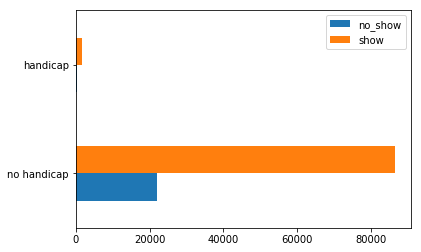

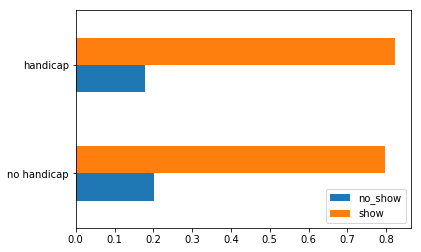

In [8]:
plot_ratio(handicap, noshow, ('no handicap', 'handicap'))

[19736, 79925, 2578, 8283]
[0.19803132619580377, 0.8019686738041962, 0.2373630420771568, 0.7626369579228433]


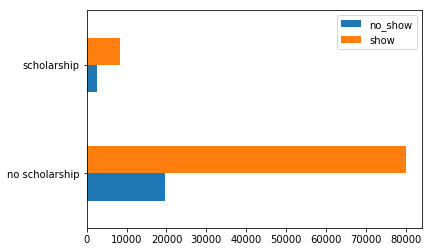

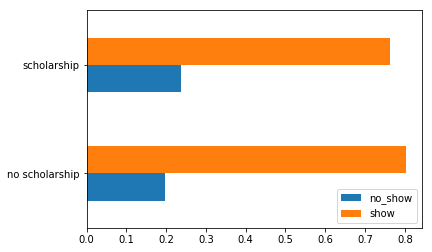

In [9]:
plot_ratio(scholarship, noshow, ('no scholarship', 'scholarship'))

[18542, 70179, 3772, 18029]
[0.2089922340821226, 0.7910077659178774, 0.17301958625751113, 0.8269804137424889]


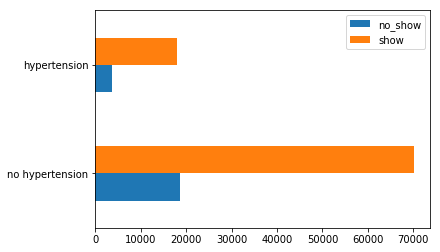

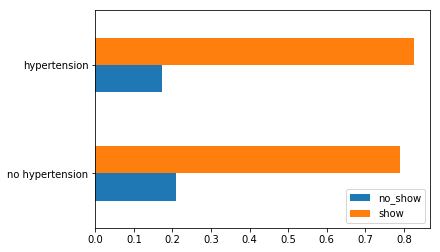

In [10]:
plot_ratio(hypertension, noshow, ('no hypertension', 'hypertension'))

[14591, 57246, 7723, 30962]
[0.203112602140958, 0.796887397859042, 0.19963810262375598, 0.800361897376244]


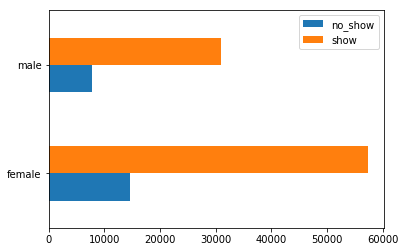

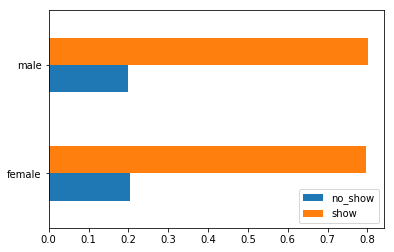

In [11]:
plot_ratio(gender, noshow, ('female', 'male'))

[12530, 62510, 9784, 25698]
[0.1669776119402985, 0.8330223880597015, 0.27574544839637, 0.7242545516036301]


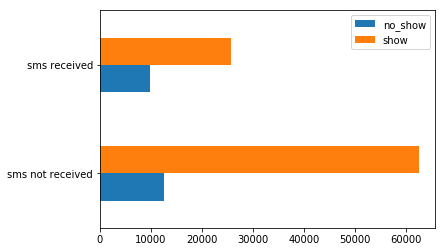

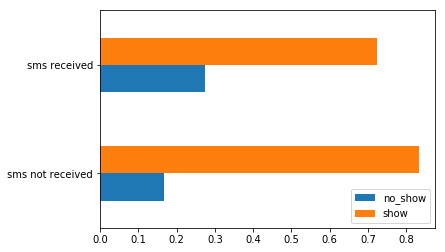

In [12]:
plot_ratio(sms, noshow, ('sms not received', 'sms received'))

[20884, 81695, 1430, 6513]
[0.2035894286354907, 0.7964105713645093, 0.18003273322422259, 0.8199672667757774]


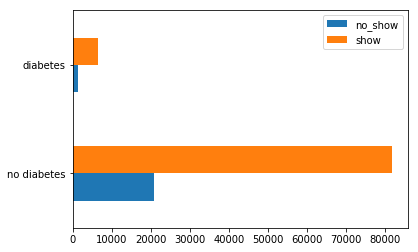

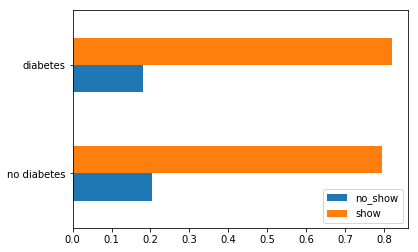

In [13]:
plot_ratio(diabetes, noshow, ('no diabetes', 'diabetes'))

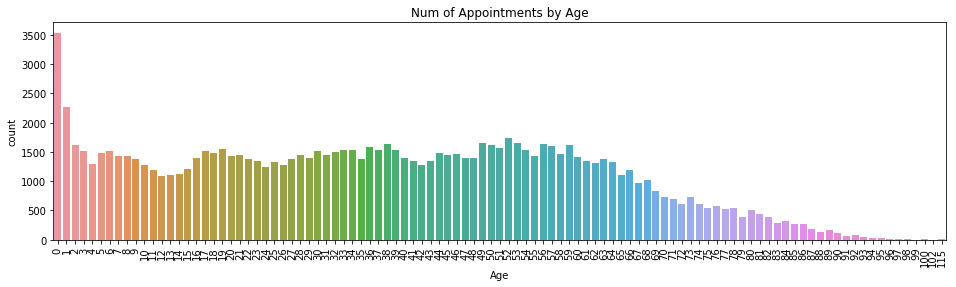

In [14]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age[df.Age>=0])
ax.set_title("Num of Appointments by Age")
plt.show()

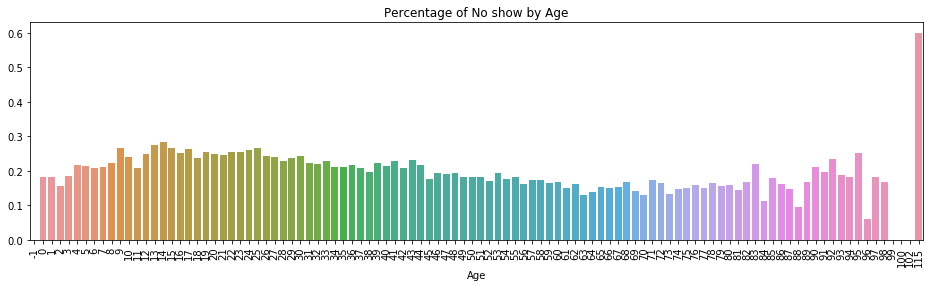

In [15]:
df_age_ratio = df[df.NoShow == 1].groupby(['Age']).size()/df.groupby(['Age']).size()
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of No-Show by Age")
plt.show()

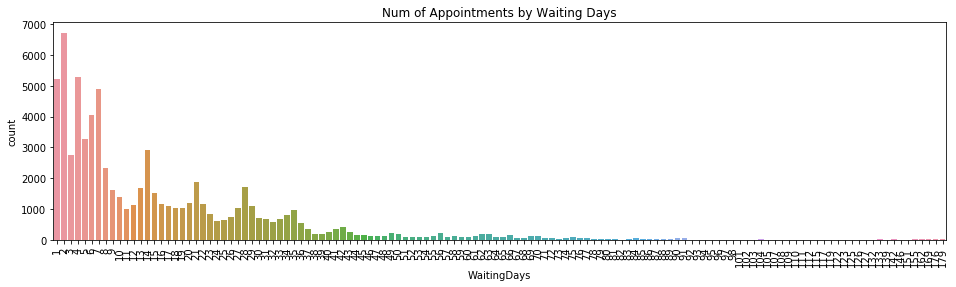

In [16]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.WaitingDays[df.WaitingDays>0])
ax.set_title("Num of Appointments by Waiting Days")
plt.show()

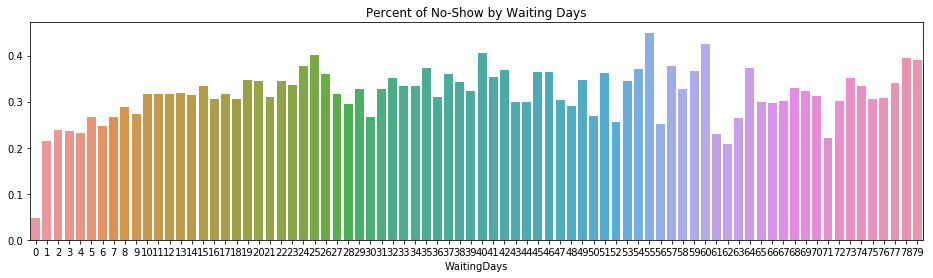

In [19]:
df_w_ratio = df[df.NoShow == 1].groupby(['WaitingDays']).size()/df.groupby(['WaitingDays']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.WaitingDays.iloc[:80].index)
ax.set_title("Percent of No-Show by Waiting Days")
plt.show()

In [34]:
## Defining the categories label:
categories = pd.Series(['Same day: 0', 'Short: 1-3', 'Week: 4-7', '2Weeks: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180'])
df['WaitingCategory'] = pd.cut(df.WaitingDays, bins=[-1,0,3,7,15,30,90,180], labels=categories)
df['WaitingCategory'].dropna(inplace=True)

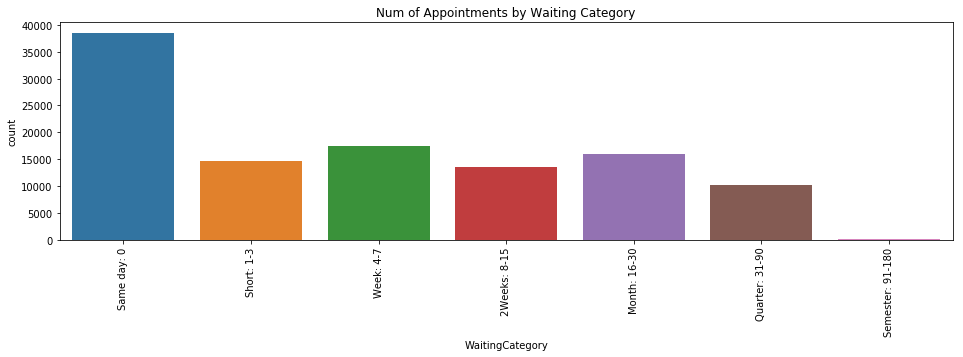

In [36]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.WaitingCategory)
ax.set_title("Num of Appointments by Waiting Category")
plt.show()

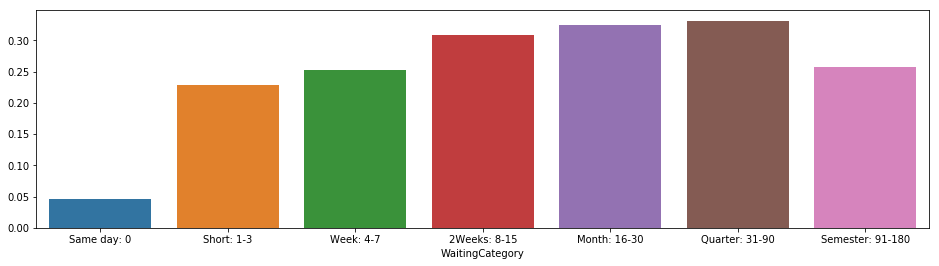

In [37]:
df_w_ratio = df[df.NoShow == 1].groupby(['WaitingCategory']).size()/df.groupby(['WaitingCategory']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio)